In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df = df.drop('id',axis = 1)
df = df.drop('zipcode',axis = 1)

In [6]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['Year'] = df['date'].apply(lambda time : time.year)
df['Month'] = df['date'].apply(lambda time : time.month)
df = df.drop('date',axis = 1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Year,Month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


<AxesSubplot:>

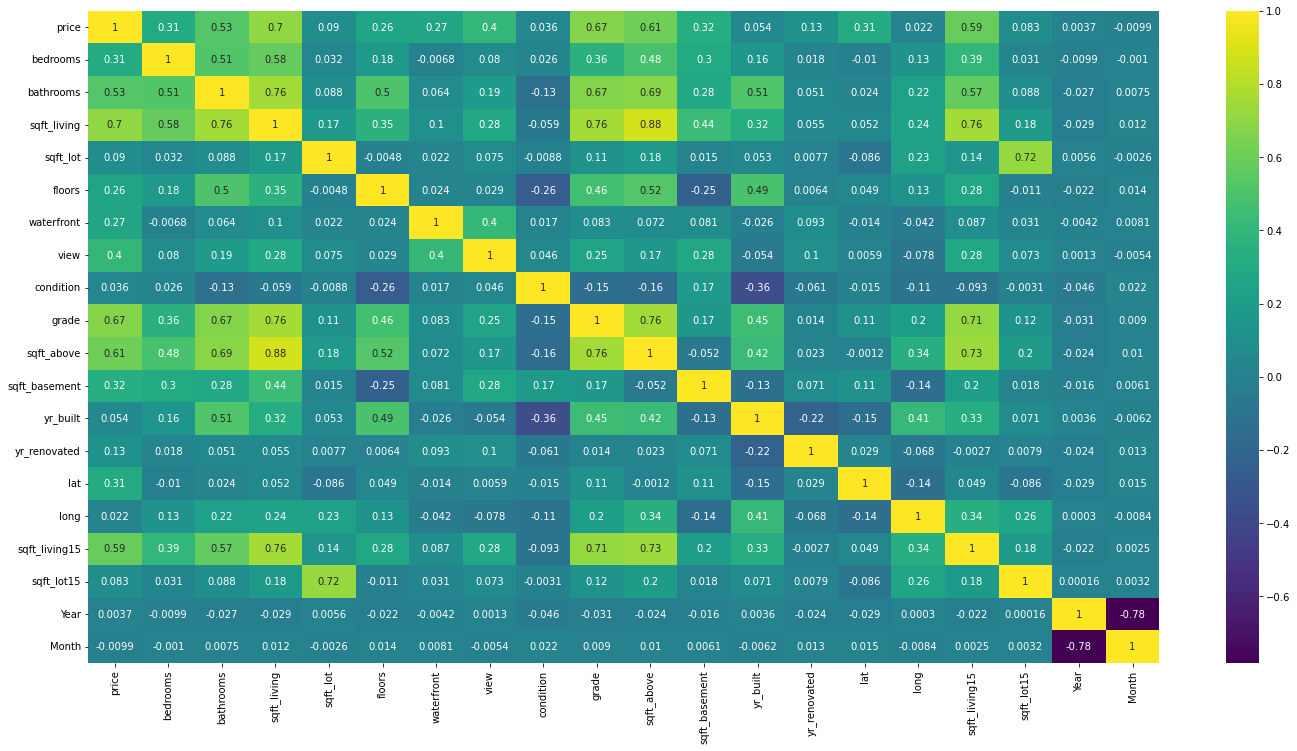

In [9]:
plt.figure(figsize = (24,12))
sns.heatmap(df.corr(),annot = True,cmap='viridis')

In [10]:
def visualizer_barplot(horizontal,vertical,dataset,separater):
    plt.figure(figsize = (12,6))
    sns.barplot(x = horizontal , y = vertical ,data = dataset, hue = separater,palette="husl",alpha = 0.8)
def visualizer_countplot(horizontal,dataset,separater,palet):
    plt.figure(figsize = (12,6))
    sns.countplot(x=horizontal,hue=separater,data=dataset,palette=palet)
def visualizer_scatterplot(horizontal,vertical,dataset,separater):
    plt.figure(figsize = (12,6))
    sns.scatterplot(x = horizontal , y = vertical ,data = dataset, hue = separater,palette="husl",alpha = 0.8)

In [11]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
Year             0.003727
Month           -0.009928
Name: price, dtype: float64

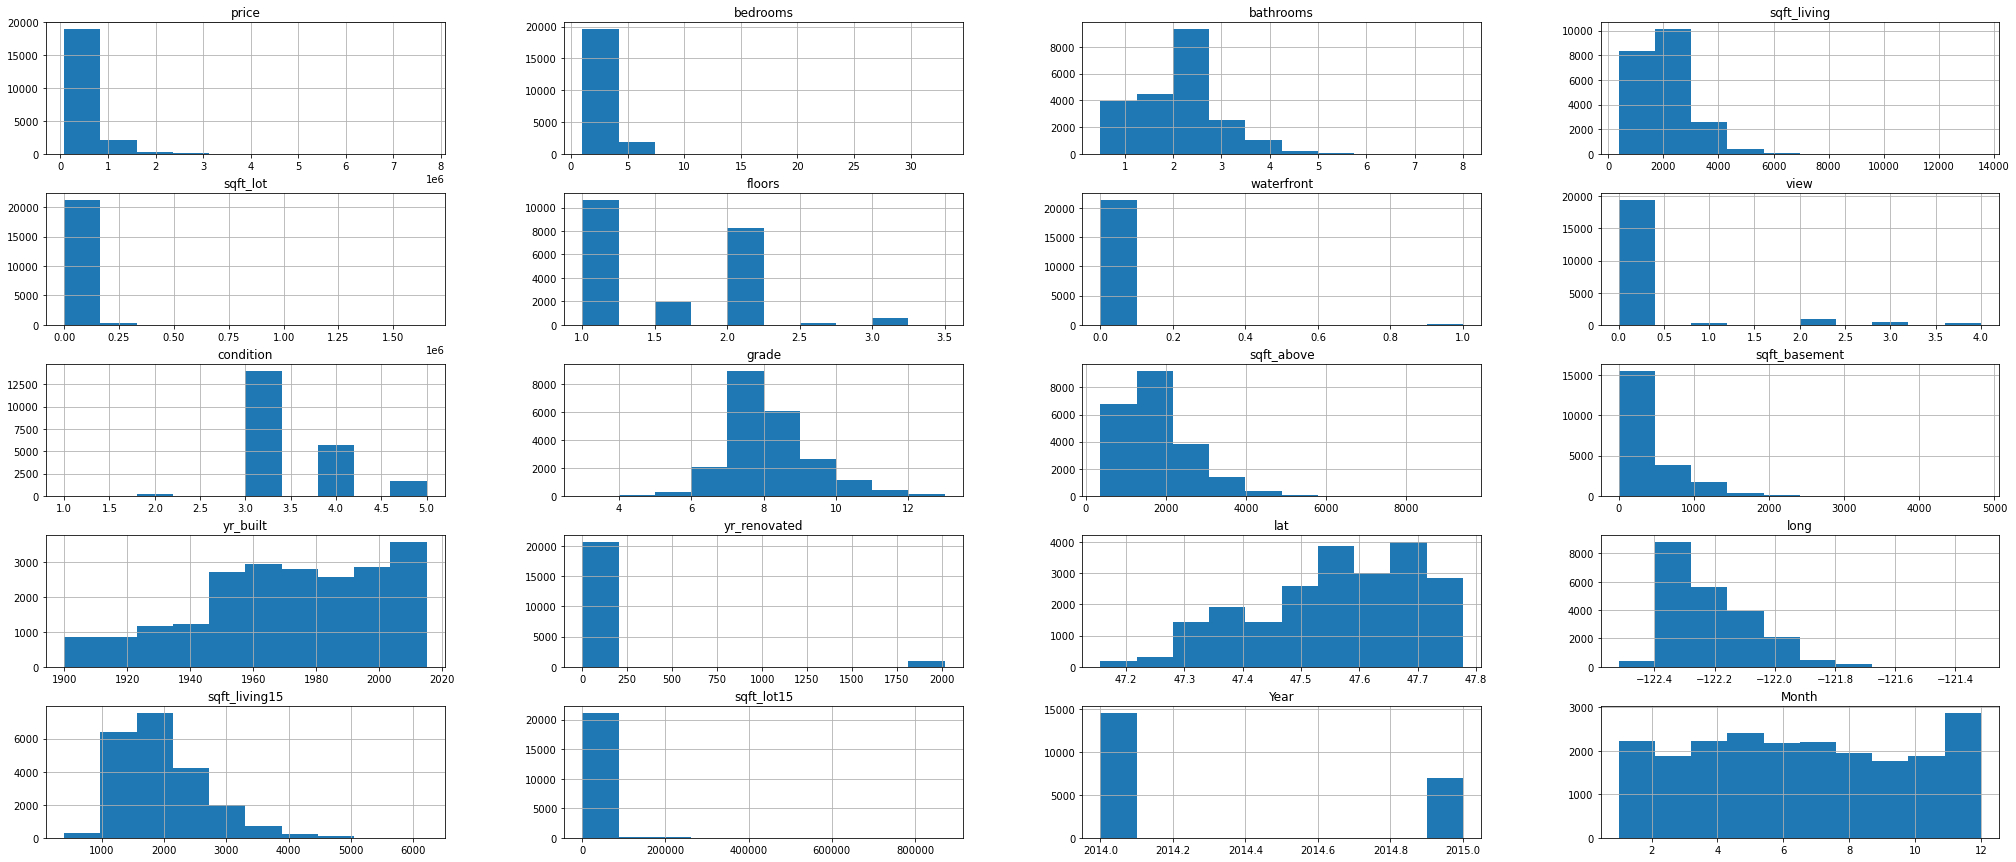

In [12]:
df.hist(figsize = (35,15))
plt.show()

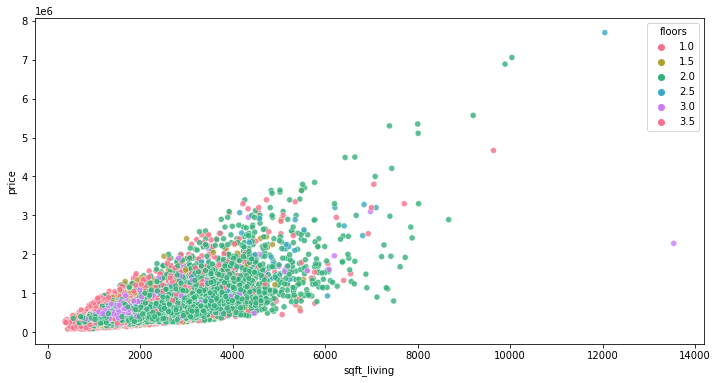

In [13]:
visualizer_scatterplot('sqft_living','price',df,'floors')

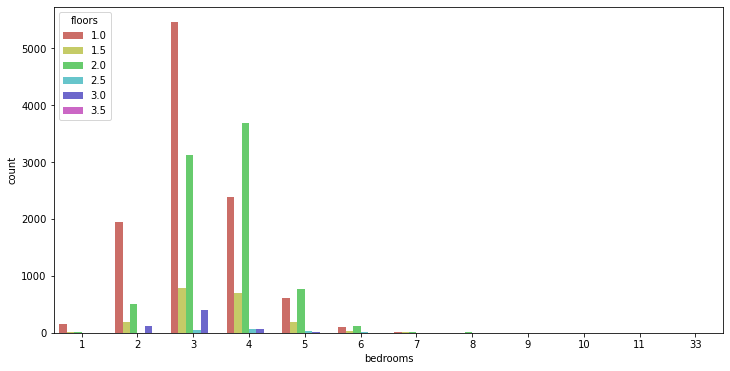

In [14]:
visualizer_countplot('bedrooms',df,'floors','hls')

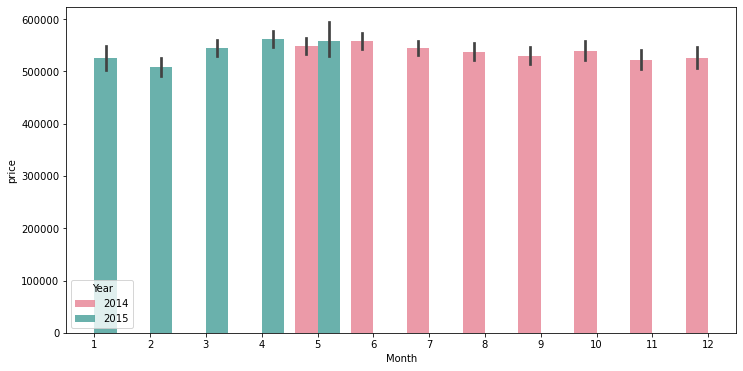

In [15]:
visualizer_barplot('Month','price',df,'Year')

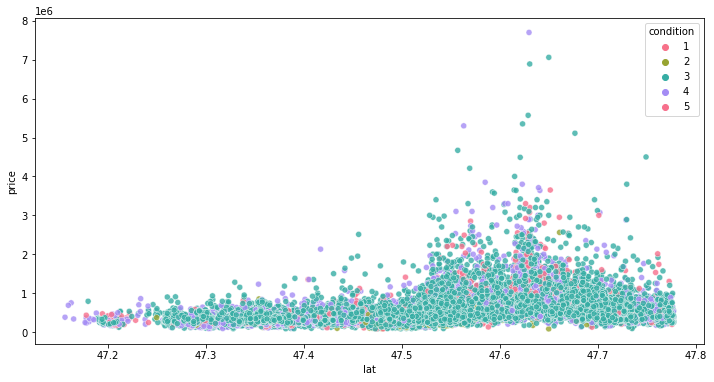

In [16]:
visualizer_scatterplot('lat','price',df,'condition')

<AxesSubplot:xlabel='Month'>

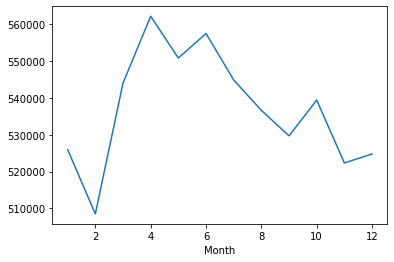

In [17]:
df.groupby('Month').mean()['price'].plot()

In [18]:
X = df.drop('price',axis = 1).values
y = df['price'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scale = MinMaxScaler()

In [22]:
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [23]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))


model.compile(loss = 'mse',optimizer = 'adam')

In [24]:
model.fit(x = X_train, y = y_train,batch_size=128,epochs = 300,validation_data = (X_test,y_test))

Epoch 1/300
135/135 [==============================] - 1s 3ms/step - loss: 429356253184.0000 - val_loss: 416791855104.0000
Epoch 2/300
135/135 [==============================] - 0s 2ms/step - loss: 428662685696.0000 - val_loss: 414888394752.0000
Epoch 3/300
135/135 [==============================] - 0s 2ms/step - loss: 423209893888.0000 - val_loss: 404188200960.0000
Epoch 4/300
135/135 [==============================] - 0s 2ms/step - loss: 402736644096.0000 - val_loss: 372150730752.0000
Epoch 5/300
135/135 [==============================] - 0s 2ms/step - loss: 355557408768.0000 - val_loss: 309734014976.0000
Epoch 6/300
135/135 [==============================] - 0s 2ms/step - loss: 279351033856.0000 - val_loss: 224077103104.0000
Epoch 7/300
135/135 [==============================] - 0s 2ms/step - loss: 194970632192.0000 - val_loss: 147031769088.0000
Epoch 8/300
135/135 [==============================] - 0s 2ms/step - loss: 136639471616.0000 - val_loss: 107731091456.0000
Epoch 9/300
135/

135/135 [==============================] - 0s 2ms/step - loss: 56553869312.0000 - val_loss: 44368465920.0000
Epoch 69/300
135/135 [==============================] - 0s 2ms/step - loss: 57293889536.0000 - val_loss: 44185903104.0000
Epoch 70/300
135/135 [==============================] - 0s 2ms/step - loss: 57089265664.0000 - val_loss: 44015398912.0000
Epoch 71/300
135/135 [==============================] - 0s 2ms/step - loss: 56095752192.0000 - val_loss: 43892252672.0000
Epoch 72/300
135/135 [==============================] - 0s 2ms/step - loss: 55027654656.0000 - val_loss: 43633614848.0000
Epoch 73/300
135/135 [==============================] - 0s 2ms/step - loss: 55797161984.0000 - val_loss: 43585011712.0000
Epoch 74/300
135/135 [==============================] - 0s 2ms/step - loss: 57245024256.0000 - val_loss: 43501039616.0000
Epoch 75/300
135/135 [==============================] - 0s 2ms/step - loss: 57295224832.0000 - val_loss: 43178651648.0000
Epoch 76/300
135/135 [===============

Epoch 135/300
135/135 [==============================] - 0s 2ms/step - loss: 48788791296.0000 - val_loss: 38160723968.0000
Epoch 136/300
135/135 [==============================] - 0s 2ms/step - loss: 50005647360.0000 - val_loss: 38030434304.0000
Epoch 137/300
135/135 [==============================] - 0s 2ms/step - loss: 50835447808.0000 - val_loss: 38007111680.0000
Epoch 138/300
135/135 [==============================] - 0s 2ms/step - loss: 47795929088.0000 - val_loss: 38052749312.0000
Epoch 139/300
135/135 [==============================] - 0s 2ms/step - loss: 48990412800.0000 - val_loss: 37846364160.0000
Epoch 140/300
135/135 [==============================] - 0s 2ms/step - loss: 48002084864.0000 - val_loss: 37842378752.0000
Epoch 141/300
135/135 [==============================] - 0s 2ms/step - loss: 49231360000.0000 - val_loss: 37750272000.0000
Epoch 142/300
135/135 [==============================] - 0s 2ms/step - loss: 49466290176.0000 - val_loss: 37874638848.0000
Epoch 143/300
13

135/135 [==============================] - 0s 2ms/step - loss: 46392930304.0000 - val_loss: 35310608384.0000
Epoch 202/300
135/135 [==============================] - 0s 2ms/step - loss: 46402297856.0000 - val_loss: 35365212160.0000
Epoch 203/300
135/135 [==============================] - 0s 2ms/step - loss: 45710028800.0000 - val_loss: 35169980416.0000
Epoch 204/300
135/135 [==============================] - 0s 2ms/step - loss: 46937362432.0000 - val_loss: 35332866048.0000
Epoch 205/300
135/135 [==============================] - 0s 2ms/step - loss: 44860129280.0000 - val_loss: 35211755520.0000
Epoch 206/300
135/135 [==============================] - 0s 2ms/step - loss: 47723974656.0000 - val_loss: 35162566656.0000
Epoch 207/300
135/135 [==============================] - 0s 2ms/step - loss: 46049832960.0000 - val_loss: 35142889472.0000
Epoch 208/300
135/135 [==============================] - 0s 2ms/step - loss: 45774925824.0000 - val_loss: 35168378880.0000
Epoch 209/300
135/135 [=======

135/135 [==============================] - 0s 2ms/step - loss: 44975398912.0000 - val_loss: 33974403072.0000
Epoch 268/300
135/135 [==============================] - 0s 2ms/step - loss: 43469045760.0000 - val_loss: 33871720448.0000
Epoch 269/300
135/135 [==============================] - 0s 2ms/step - loss: 43905134592.0000 - val_loss: 33905874944.0000
Epoch 270/300
135/135 [==============================] - 0s 2ms/step - loss: 43856642048.0000 - val_loss: 33781690368.0000
Epoch 271/300
135/135 [==============================] - 0s 2ms/step - loss: 44674887680.0000 - val_loss: 33780314112.0000
Epoch 272/300
135/135 [==============================] - 0s 2ms/step - loss: 44329160704.0000 - val_loss: 33911347200.0000
Epoch 273/300
135/135 [==============================] - 0s 2ms/step - loss: 44960534528.0000 - val_loss: 33873657856.0000
Epoch 274/300
135/135 [==============================] - 0s 2ms/step - loss: 43680563200.0000 - val_loss: 33742755840.0000
Epoch 275/300
135/135 [=======

In [25]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

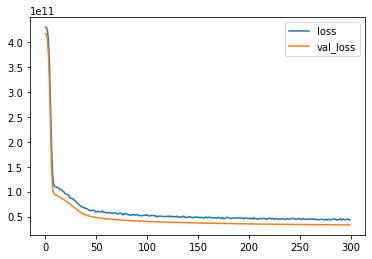

In [26]:
losses.plot()

In [27]:
model_pred = model.predict(X_test)

135/135 [==============================] - 0s 674us/step


Text(0, 0.5, 'y_predict')

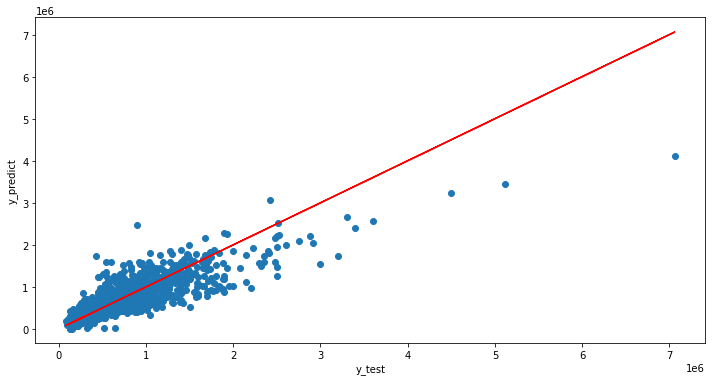

In [28]:
plt.figure(figsize = (12,6))
plt.scatter(y_test,model_pred)
plt.plot(y_test,y_test,'r')
plt.xlabel('y_test')
plt.ylabel('y_predict')

In [29]:
def Scores_of_model(y_true,y_pred):
    print("""
    Mean Absolute Error  = {},

    Mean Squared Error  = {},

    Explained Varience Score = {},
    
    Root Mean Squared Error = {}
    """.format(mean_absolute_error(y_true,y_pred),mean_squared_error(y_true,y_pred),explained_variance_score(y_true,y_pred),np.sqrt(mean_squared_error(y_true,y_pred))))

In [30]:
Scores_of_model(y_test,model_pred)


    Mean Absolute Error  = 111205.47233818902,

    Mean Squared Error  = 33311128290.41068,

    Explained Varience Score = 0.7452648506603008,
    
    Root Mean Squared Error = 182513.36468985135
    
